Import libraries

In [1]:
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from typing import Tuple

# Answer to (1) (a)


In [2]:
def load_dataset(
src_dir: str
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """Load the dataset as a set of numpy arrays.
    Args:
    src_dir: Directory where dataset files are stored.
    Returns:
    (x_train, y_train, x_val, y_val, x_test) tuple where each array is one dimensional.
    """
    if(src_dir!=''):
        src_dir = src_dir + '/'
        
    x_train = np.loadtxt(src_dir+'x_train.txt')
    y_train = np.loadtxt(src_dir+'y_train.txt')
    x_val = np.loadtxt(src_dir+'x_val.txt')
    y_val = np.loadtxt(src_dir+'y_val.txt')
    x_test = np.loadtxt(src_dir+'x_test.txt')
    
    return x_train, y_train, x_val, y_val, x_test


#Answer to (1) (b) (i)

In [3]:
def get_features(x: np.ndarray, n: int) -> np.ndarray:
    """Creates n-th degree polynomial features for the given vector x.
    Example usage:
    get_features(np.array([1.0, 2.0, 3.0]), 3) outputs
    np.array([[ 1., 1., 1.],
    [ 2., 4., 8.],
    [ 3., 9., 27.]])
    Args:
    x: A numpy array of shape (num_examples, ) or (num_examples, 1).
    n: The degree of the polynomial features.
    Returns:
    A matrix of shape (num_examples, n) where the j-th column is equal to
    the vector x raised, elementwise, to the power j.
    """
    poly_feature_matrix = np.zeros([n,x.size])

    for i in range(0,n):
        poly_feature_matrix[i,:] = np.power(x,i+1)
        
    poly_feature_matrix = np.transpose(poly_feature_matrix)
    
    return poly_feature_matrix


#Answer to (1) (b) (ii)

Method 1: MSE calculation from the equation

In [4]:
def fit_and_evaluate(
    x_train: np.ndarray, y_train: np.ndarray,
    x_val: np.ndarray, y_val: np.ndarray,
    n: int
    ) -> Tuple[float, float]:
    """Fits an n-th degree polynomial and outputs train and validation MSE.
    Fits a linear regression model y = sum_{i=1}^n w_i x^i to the given train
    set and outputs the mean-squared-error (MSE) on train and validation sets.
    Args:
    x_train: Input features for the train set. Has shape (num_train, )
    y_train: Targets (labels) for the train set. Has shape (num_train, )
    x_val: Input features for the validation set. Has shape (num_val, )
    y_val: Targets (labels) for the validation set. Has shape (num_val, )
    n: The degree of the polynomial fit. See the above equation.
    Returns:
    (train_mse, val_mse), tuple of MSE on train and validation sets.
    """
    # Fit the model on the train set.
    x_train_features = get_features(x_train,n)
    model = LinearRegression(fit_intercept=False).fit(x_train_features,y_train)

    # Generate model predictions for the train set and calculate the MSE.
    y_predict_train = model.predict(x_train_features)
    train_mse = np.power((y_train - y_predict_train),2).sum()/x_train.size
    
    # Similarly, calculate the MSE on the val set.
    x_val_features = get_features(x_val,n) 
    y_predict_val = model.predict(x_val_features)
    val_mse = np.power((y_val - y_predict_val),2).sum()/x_val.size
    
    return train_mse, val_mse


Method 2: MSE calculation from sklearn.metrics.mean_squared_error

In [5]:
from sklearn.metrics import mean_squared_error as mse

def fit_and_evaluate_(
    x_train: np.ndarray, y_train: np.ndarray,
    x_val: np.ndarray, y_val: np.ndarray,
    n: int
    ) -> Tuple[float, float]:
    """Fits an n-th degree polynomial and outputs train and validation MSE.
    Fits a linear regression model y = sum_{i=1}^n w_i x^i to the given train
    set and outputs the mean-squared-error (MSE) on train and validation sets.
    Args:
    x_train: Input features for the train set. Has shape (num_train, )
    y_train: Targets (labels) for the train set. Has shape (num_train, )
    x_val: Input features for the validation set. Has shape (num_val, )
    y_val: Targets (labels) for the validation set. Has shape (num_val, )
    n: The degree of the polynomial fit. See the above equation.
    Returns:
    (train_mse, val_mse), tuple of MSE on train and validation sets.
    """
    # Fit the model on the train set.
    x_train_features = get_features(x_train,n)
    model = LinearRegression(fit_intercept=False).fit(x_train_features,y_train)

    # Generate model predictions for the train set and calculate the MSE.
    y_predict_train = model.predict(x_train_features)
    train_mse = mse(y_train, y_predict_train)
    
    # Similarly, calculate the MSE on the val set.
    x_val_features = get_features(x_val,n) 
    y_predict_val = model.predict(x_val_features)
    val_mse = mse(y_val, y_predict_val)
    
    return train_mse, val_mse

#Subsequent Python-based implementation

In [7]:
[x_train, y_train, x_val, y_val, x_test] = load_dataset('')

In [8]:
upper_bound = 10
mse_array = np.zeros([upper_bound,2])

for i in range(0,upper_bound):
    mse_array[i,:] = fit_and_evaluate(x_train, y_train, x_val, y_val,i+1)


#Answer to (1) (c) 

In [9]:
n_values = range(1,upper_bound+1)

mse_df = pandas.DataFrame(mse_array) #for saving the MSEs in a csv
mse_df['n'] = n_values
mse_df.columns = ['Training set MSEs','Validation set MSEs', 'n']
mse_df = mse_df[['n', 'Training set MSEs','Validation set MSEs']]

print(mse_df.to_string(index=False))
mse_df.to_csv('MSEs against n - Training and Validation.csv', index=False)

 n  Training set MSEs  Validation set MSEs
 1           0.069869             0.072270
 2           0.005047             0.003894
 3           0.003874             0.002462
 4           0.002166             0.004120
 5           0.002020             0.004304
 6           0.001821             0.004682
 7           0.001814             0.004652
 8           0.001773             0.004996
 9           0.001766             0.004608
10           0.001589             0.004163



\begin{array}{lrrr}
n &Training\,set\,MSEs &Validation\,set\,MSEs\\
1 &0.069868788 &0.072270038 \\
2 &0.005047321 &0.003893858 \\
3 &0.003873768 &0.002461939 \\
4 &0.002165988 &0.00412025 \\
5 &0.002020267 &0.004303564 \\
6 &0.001821074 &0.004682199 \\
7 &0.00181447 &0.004651991 \\
8 &0.001773034 &0.004996135 \\
9 &0.001766428 &0.004607625 \\
10 &0.001588783 &0.004162643 \\
\end{array}


**Plotting MSE vs n graphs**

In [10]:
plt.rcParams["figure.dpi"] = 300 #change the deafult figure resolution

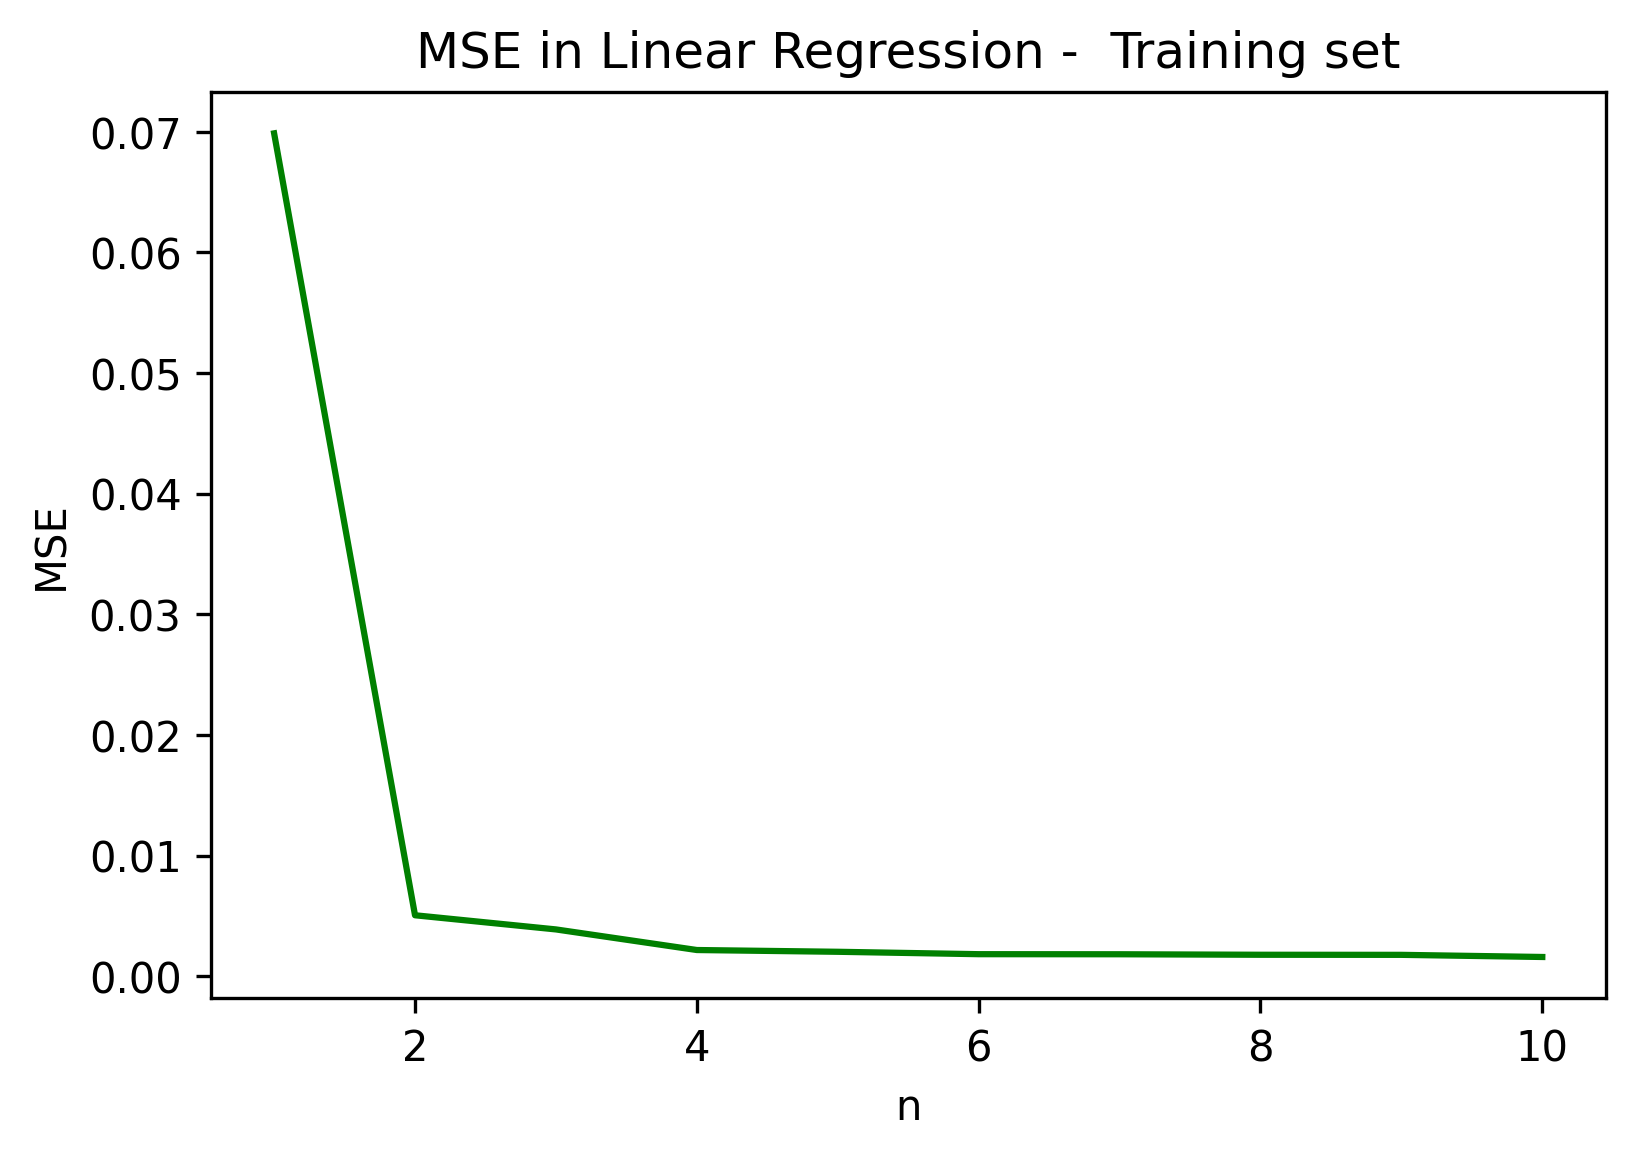

In [11]:
plt.figure()
plt.plot(n_values, mse_array[:,0], 'g')
plt.title('MSE in Linear Regression -  Training set')
plt.xlabel('n')
plt.ylabel('MSE')
plt.savefig('MSE_in_train_set')

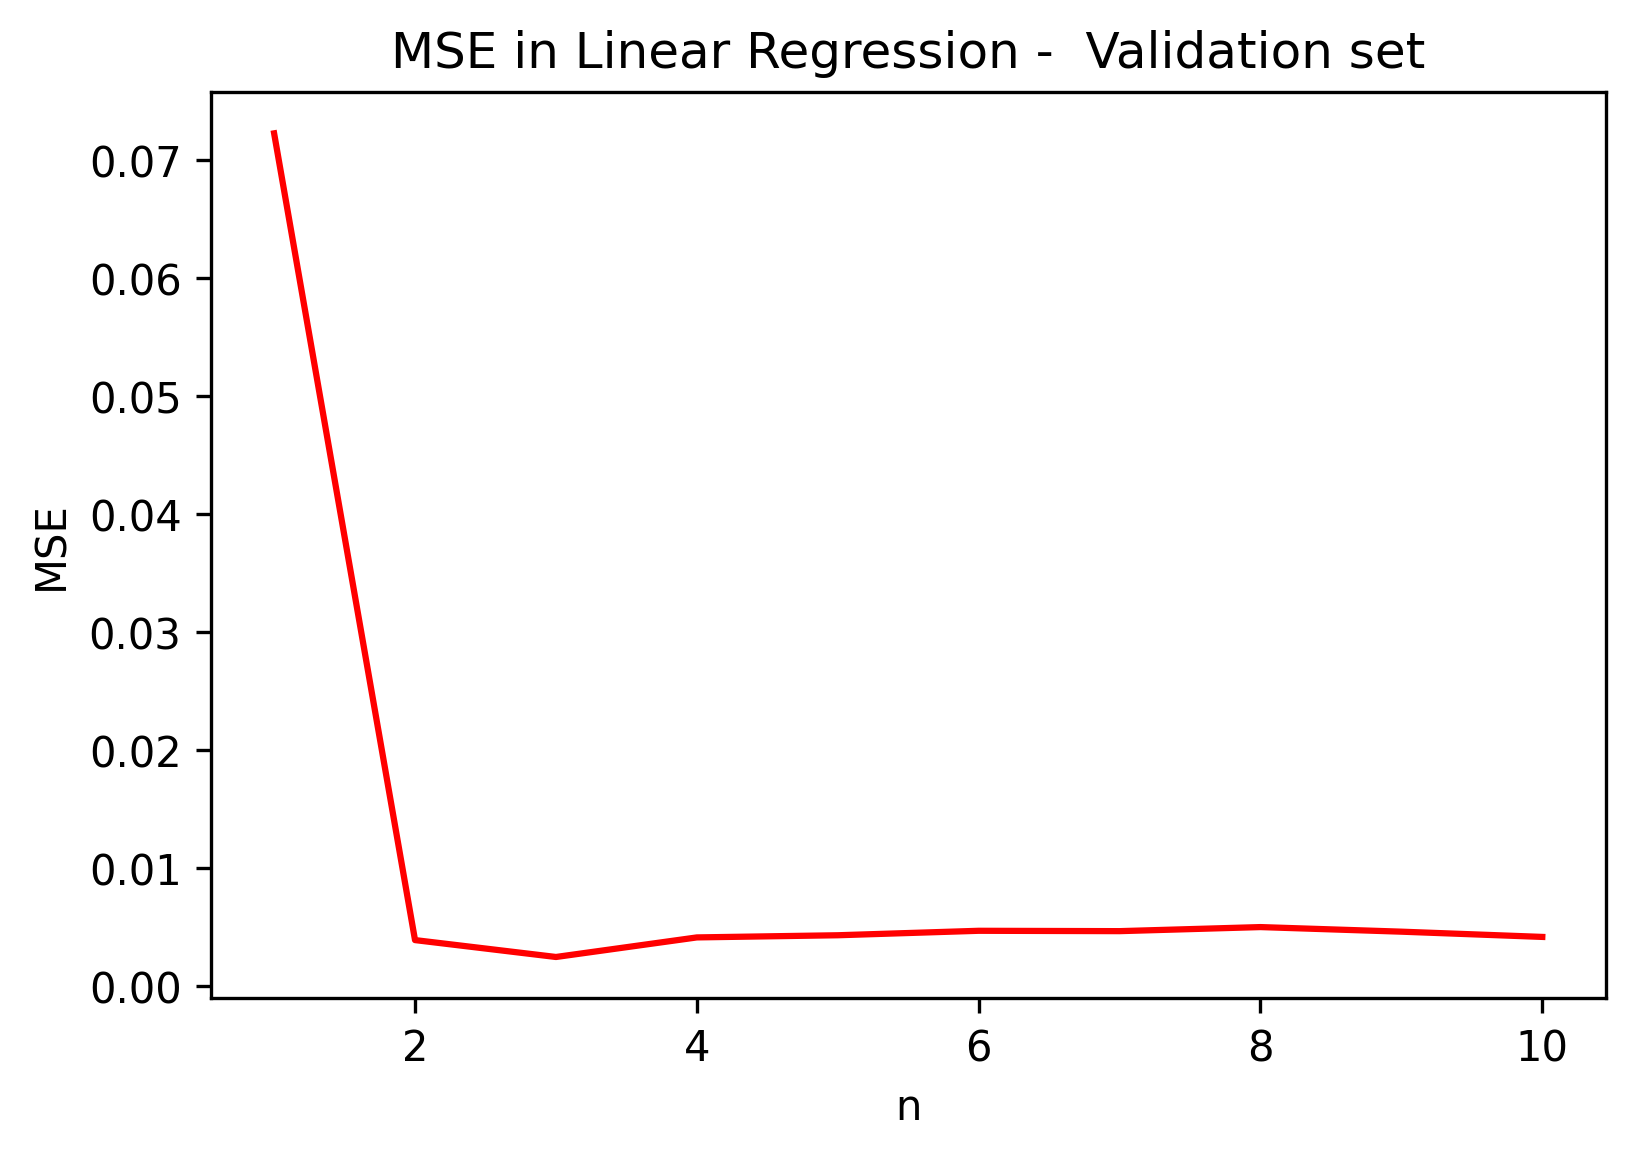

In [12]:
plt.figure()
plt.plot(n_values, mse_array[:,1], 'r')
plt.title('MSE in Linear Regression -  Validation set')
plt.xlabel('n')
plt.ylabel('MSE')
plt.savefig('MSE_in_val_set')

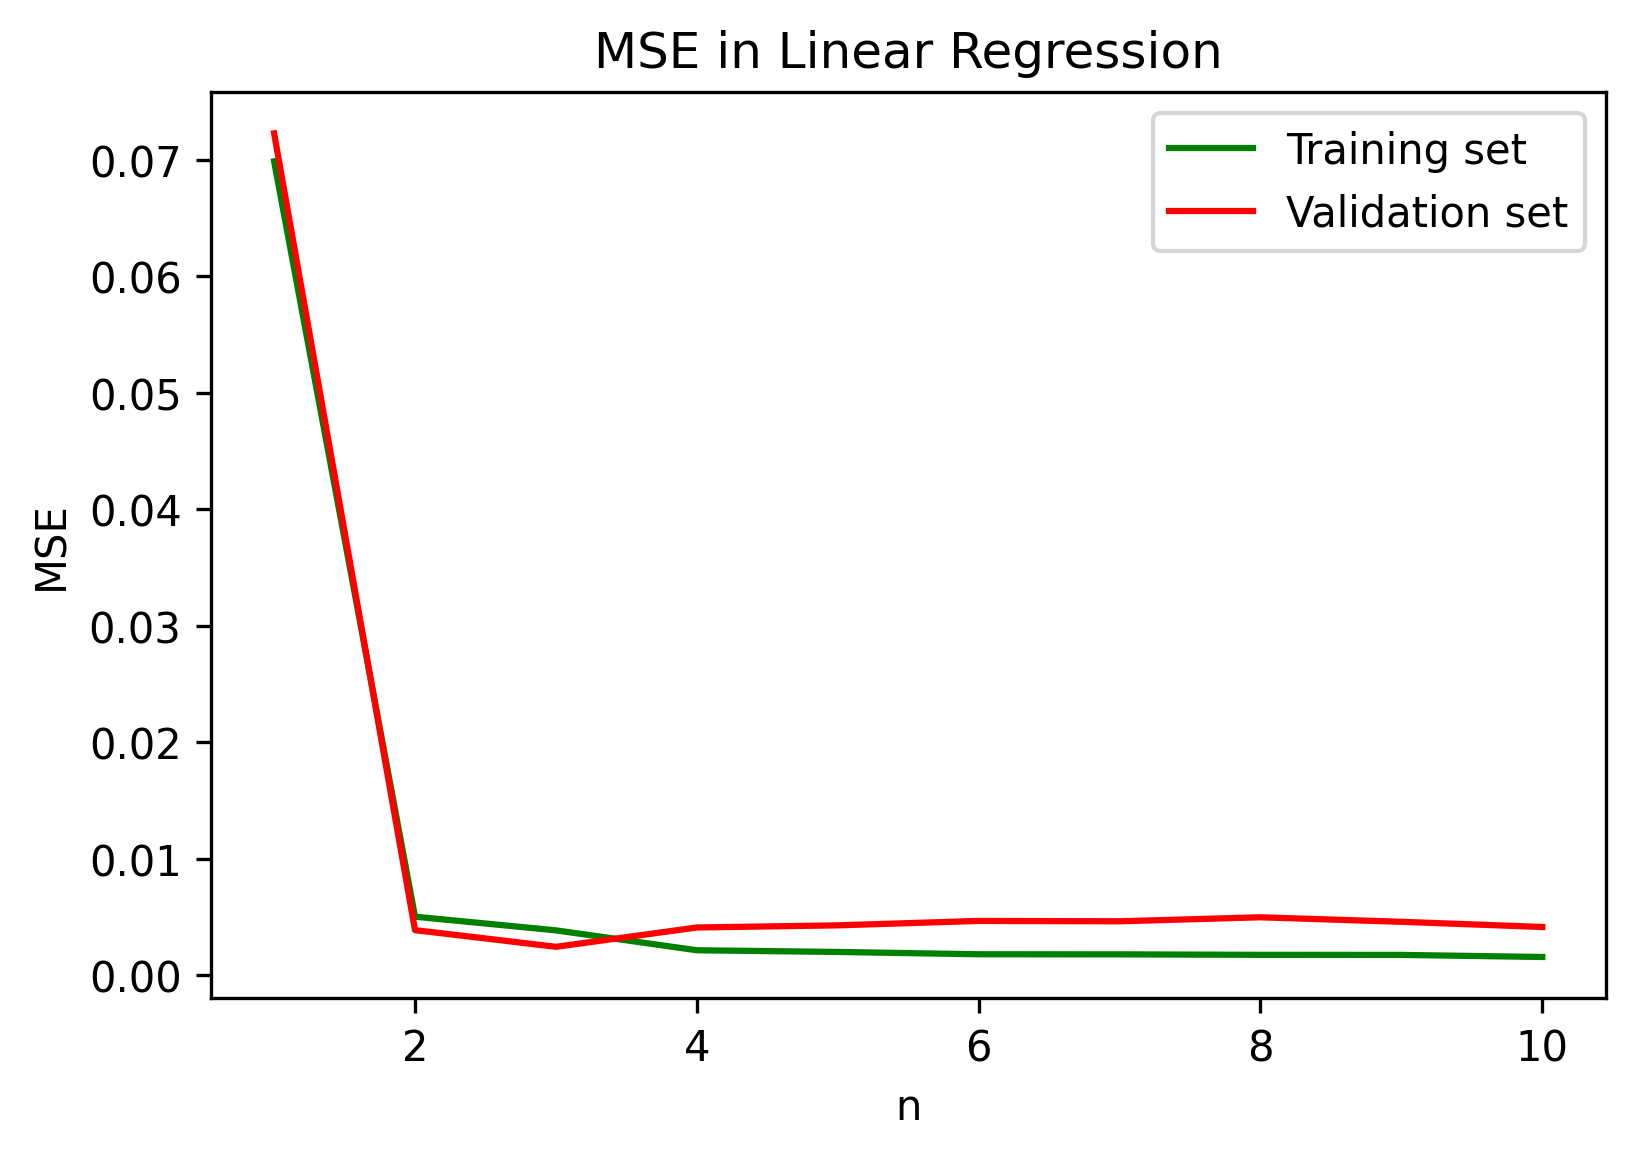

In [13]:
plt.figure()
plt.plot(n_values, mse_array[:,0], 'g')
plt.title('MSE in Linear Regression')
plt.xlabel('n')
plt.ylabel('MSE')
plt.plot(n_values, mse_array[:,1],'r')
plt.legend(['Training set','Validation set'])
plt.savefig('MSE_in_both_train_val')

*Through observing the calculated MSEs for both training and validation sets (as depicted in the above table: Training set MSEs and Validation set MSEs against n) and the above plots (MSE in Linear Regression - Validation set and MSE in Linear Regression - Training set),*

*I would select,*


> **n=3**


*because validation MSE is minimum at n=3 (i.e. MSE (val, n=3) = 0.002461939). When n is above 3, the model tends to overfit to the training set and thereby, the validation MSE is getting higher*

#Answer to (1) (d)

In [14]:
n = 3 #choosen n value by considering the minimum validation MSE
x_train_features = get_features(x_train,n)
model = LinearRegression(fit_intercept=False).fit(x_train_features,y_train)

x_test_features = get_features(x_test,n)
y_test_predict = model.predict(x_test_features)
np.savetxt('180066F_y_predict_test.txt',y_test_predict)

Here, the numbers are mentioned upto 15 decimal precision. In the submitted txt file, which comprises the predictions for x_test.txt, has the full decimal precision numbers.


\begin{array}{lrr}
Test\,Input &Prediction \\
0.408099946310876 &-0.919671771036896 \\
0.670388746049254 &-1.83759333117145 \\
0.0661556135454454 &-0.128486867808112 \\
0.893691290219071 &-2.97271229839415 \\
0.885182152056329 &-2.92212846332498 \\
0.559962322348422 &-1.40523039759975 \\
0.569050898874253 &-1.43806176671578 \\
0.799460547260773 &-2.44657121294273 \\
0.204027296185715 &-0.41286435966323 \\
0.208430386536827 &-0.422520971814956 \\
0.930781087124192 &-3.20067119257404 \\
0.760865034028111 &-2.25166723619235 \\
0.336048445040816 &-0.724998235534161 \\
0.990245680209208 &-3.59246534298857 \\
0.333691819365997 &-0.718956712554085 \\
0.39277843289821 &-0.876579730891778 \\
0.638393537851154 &-1.70454283399612 \\
0.408131236780316 &-0.919760767420466 \\
0.0953792310544752 &-0.186414768223298 \\
0.91185999934503 &-3.08284623037008 \\
0.445001121511756 &-1.02754528458343 \\
0.679081613895861 &-1.87490441167279 \\
0.52412246567585 &-1.28020853000785 \\
0.191442752493149 &-0.385502792755026 \\
0.388115260121508 &-0.863653857358733 \\
0.347535005802599 &-0.754725852452716 \\
0.883251289154815 &-2.9107377309109 \\
0.381394251161921 &-0.84517614122298 \\
0.419448838767459 &-0.952220734819361 \\
0.147699416448401 &-0.292905176571102 \\
0.368495115882985 &-0.810207294780408 \\
0.373091998309543 &-0.822595585552324 \\
0.541059292690096 &-1.33842029745055 \\
0.584682190223179 &-1.49563132673189 \\
0.214194252414648 &-0.43522933467822 \\
0.547257942221742 &-1.3601117541729 \\
0.462133696474829 &-1.07969378478299 \\
0.0653865032185863 &-0.126974365306795 \\
0.207156209546218 &-0.419721978323085 \\
0.724589557123306 &-2.07866987198403 \\
0.692875417627095 &-1.93515520406631 \\
0.515998575871676 &-1.25282581724715 \\
0.751196923592415 &-2.20461440315651 \\
0.317165526794562 &-0.677124578180544 \\
0.348379238272975 &-0.756929345362774 \\
0.514590590436605 &-1.24811498090803 \\
0.253593293838615 &-0.524281814222741 \\
0.0628094636778552 &-0.121910523280106 \\
0.500936816945525 &-1.20296067085017 \\
0.10882237983052 &-0.213400893035868 \\
0.0620688791457386 &-0.120456428511959 \\
0.266392937246184 &-0.554093357909752 \\
0.409167876071488 &-0.922711490927989 \\
0.467247668079637 &-1.09552410271034 \\
0.325219924194979 &-0.697396380494755 \\
0.783841338870037 &-2.36631567962249 \\
0.472952650809612 &-1.11332999486774 \\
0.895792678814873 &-2.98530161283728 \\
0.28199538302482 &-0.591064299523372 \\
0.806045057403976 &-2.48097664955697 \\
0.651114856927037 &-1.75664890102496 \\
0.635423454389892 &-1.69252601544629 \\
0.45833418454779 &-1.06801176828598 \\
0.796257413302684 &-2.42995755262453 \\
0.814456362832738 &-2.52542747313862 \\
0.0311586307860537 &-0.0601681849353039 \\
0.42335925799338 &-0.96356299514531 \\
0.12238995737602 &-0.240885560529547 \\
0.90572819998437 &-3.04535055612035 \\
0.253945599730137 &-0.525096311619286 \\
0.038308356058754 &-0.0740499027047419 \\
0.0857533271356165 &-0.167229447415438 \\
0.915022386082039 &-3.10231501289385 \\
0.471920550255411 &-1.1100972031223 \\
0.39968404772135 &-0.895882739169757 \\
0.846587551839903 &-2.70048983998901 \\
0.471760564203187 &-1.10959654333021 \\
0.616885694138676 &-1.6187724320152 \\
0.0781043631530421 &-0.152060078085247 \\
0.665160281105256 &-1.81539421332646 \\
0.657800235366057 &-1.78445003331471 \\
0.18001702402403 &-0.360954120909253 \\
0.0926746014298354 &-0.181013033929305 \\
0.239354141687592 &-0.49164034167759 \\
0.737078897670672 &-2.13714583937989 \\
0.0368146585291757 &-0.0711469652081825 \\
0.829011860644231 &-2.60368887008923 \\
0.297333644210386 &-0.628118020415994 \\
0.278810052076353 &-0.583458542557061 \\
0.901032838663546 &-3.01686398410026 \\
0.871822698703951 &-2.84397510140459 \\
0.705002693900722 &-1.9892035601283 \\
0.582709178495198 &-1.48828686984564 \\
0.520297333057035 &-1.26727238163658 \\
0.354753766929057 &-0.773650739245488 \\
0.461088142715176 &-1.07647239324319 \\
0.0235539030179635 &-0.0454380818035489 \\
0.702190396457144 &-1.97657913371069 \\
0.449636976557011 &-1.0415230137195 \\
0.373624880453876 &-0.82403690596411 \\
\end{array}